In [1]:
!pip install shap

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import xgboost as xgb
import shap
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

## California Housing Prices

In [4]:
dataset = fetch_california_housing(as_frame = True)
x = dataset['data']
y = dataset['target']

In [5]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

## Spliting data into training and testing data

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

# Train an XGBoost Model

In [8]:
model = xgb.XGBRegressor(objective = 'reg:squarederror', random_state=0)
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

# Explain predictions with SHAP values

In [9]:
explainer = shap.Explainer(model)
shap_values = explainer(x_test)

# Visualize the SHAP values for a specific instances

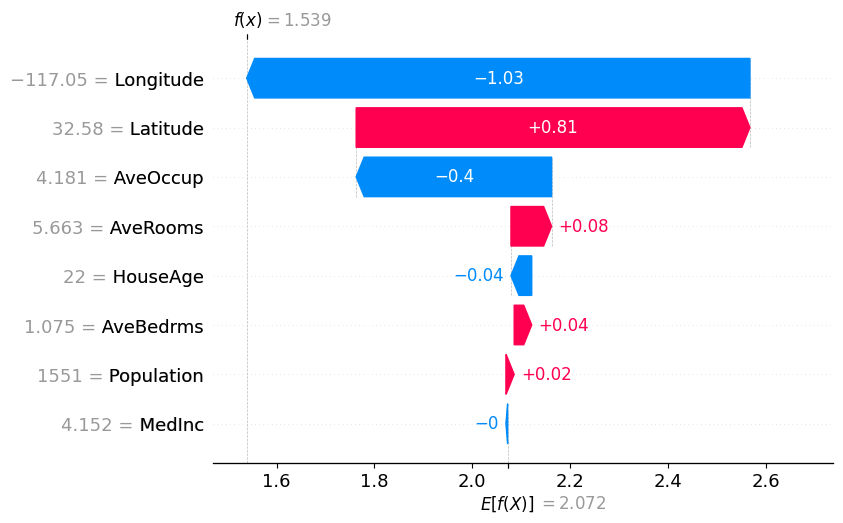

In [10]:
shap.plots.waterfall(shap_values[0])

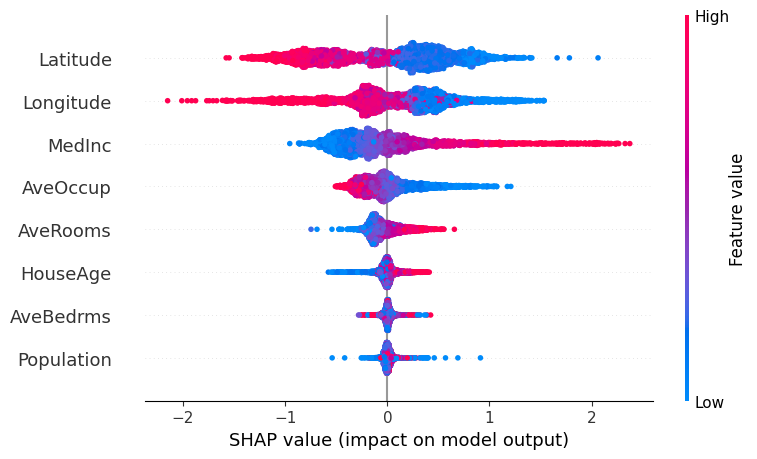

In [11]:
# Summary plot of SHAP Values
shap.summary_plot(shap_values, x_test)

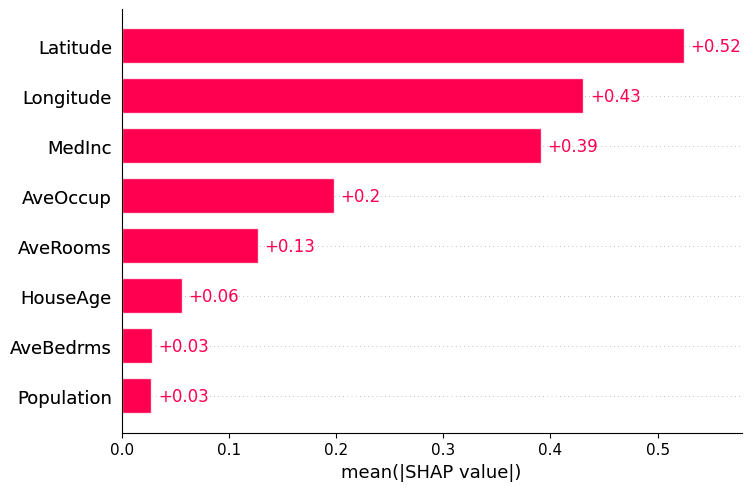

In [12]:
# Bar plot of SHAP Values
shap.plots.bar(shap_values)